<a href="https://colab.research.google.com/github/sispo3314/AI_study/blob/main/PAMAP2/PAMAP_ResNet_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import layers, models

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [2]:
DATA_PATH ='/content/drive/MyDrive/datasets/PAMAP2_integrated_data.csv'

In [3]:
df = pd.read_csv(DATA_PATH, low_memory=False)
df = df[df['activityID'] != 0]
print(df.shape)
df.head()

(2724953, 55)


,timestamp,activityID,heart_rate,hand_temp,hand_acc_16g_x,hand_acc_16g_y,hand_acc_16g_z,hand_acc_6g_x,hand_acc_6g_y,hand_acc_6g_z,...,ankle_gyro_y,ankle_gyro_z,ankle_mag_x,ankle_mag_y,ankle_mag_z,ankle_orient_1,ankle_orient_2,ankle_orient_3,ankle_orient_4,subject
2928,37.66,1.0,NaN,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1.0,0.0,0.0,0.0,Protocol_subject101
2929,37.67,1.0,NaN,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1.0,0.0,0.0,0.0,Protocol_subject101
2930,37.68,1.0,NaN,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1.0,0.0,0.0,0.0,Protocol_subject101
2931,37.69,1.0,NaN,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1.0,0.0,0.0,0.0,Protocol_subject101
2932,37.70,1.0,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.0,0.0,0.0,0.0,Protocol_subject101


In [4]:
df.columns.tolist()

['timestamp',
 'activityID',
 'heart_rate',
 'hand_temp',
 'hand_acc_16g_x',
 'hand_acc_16g_y',
 'hand_acc_16g_z',
 'hand_acc_6g_x',
 'hand_acc_6g_y',
 'hand_acc_6g_z',
 'hand_gyro_x',
 'hand_gyro_y',
 'hand_gyro_z',
 'hand_mag_x',
 'hand_mag_y',
 'hand_mag_z',
 'hand_orient_1',
 'hand_orient_2',
 'hand_orient_3',
 'hand_orient_4',
 'chest_temp',
 'chest_acc_16g_x',
 'chest_acc_16g_y',
 'chest_acc_16g_z',
 'chest_acc_6g_x',
 'chest_acc_6g_y',
 'chest_acc_6g_z',
 'chest_gyro_x',
 'chest_gyro_y',
 'chest_gyro_z',
 'chest_mag_x',
 'chest_mag_y',
 'chest_mag_z',
 'chest_orient_1',
 'chest_orient_2',
 'chest_orient_3',
 'chest_orient_4',
 'ankle_temp',
 'ankle_acc_16g_x',
 'ankle_acc_16g_y',
 'ankle_acc_16g_z',
 'ankle_acc_6g_x',
 'ankle_acc_6g_y',
 'ankle_acc_6g_z',
 'ankle_gyro_x',
 'ankle_gyro_y',
 'ankle_gyro_z',
 'ankle_mag_x',
 'ankle_mag_y',
 'ankle_mag_z',
 'ankle_orient_1',
 'ankle_orient_2',
 'ankle_orient_3',
 'ankle_orient_4',
 'subject']

In [5]:
columns = [
    "activityID",
    "hand_temp", "hand_acc_6g_x", "hand_acc_6g_y", "hand_acc_6g_z",
    "hand_gyro_x", "hand_gyro_y", "hand_gyro_z",
    "hand_mag_x", "hand_mag_y", "hand_mag_z",
    "chest_temp", "chest_acc_6g_x", "chest_acc_6g_y", "chest_acc_6g_z",
    "chest_gyro_x", "chest_gyro_y", "chest_gyro_z",
    "chest_mag_x", "chest_mag_y", "chest_mag_z",
    "ankle_temp", "ankle_acc_6g_x", "ankle_acc_6g_y", "ankle_acc_6g_z",
    "ankle_gyro_x", "ankle_gyro_y", "ankle_gyro_z",
    "ankle_mag_x", "ankle_mag_y", "ankle_mag_z",
]

In [6]:
df = df[columns].copy()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2724953 entries, 2928 to 3850040
Data columns (total 31 columns):
 #   Column          Dtype  
---  ------          -----  
 0   activityID      float64
 1   hand_temp       float64
 2   hand_acc_6g_x   float64
 3   hand_acc_6g_y   float64
 4   hand_acc_6g_z   float64
 5   hand_gyro_x     float64
 6   hand_gyro_y     float64
 7   hand_gyro_z     float64
 8   hand_mag_x      float64
 9   hand_mag_y      float64
 10  hand_mag_z      float64
 11  chest_temp      float64
 12  chest_acc_6g_x  float64
 13  chest_acc_6g_y  float64
 14  chest_acc_6g_z  float64
 15  chest_gyro_x    float64
 16  chest_gyro_y    float64
 17  chest_gyro_z    float64
 18  chest_mag_x     float64
 19  chest_mag_y     float64
 20  chest_mag_z     float64
 21  ankle_temp      float64
 22  ankle_acc_6g_x  float64
 23  ankle_acc_6g_y  float64
 24  ankle_acc_6g_z  float64
 25  ankle_gyro_x    float64
 26  ankle_gyro_y    float64
 27  ankle_gyro_z    float64
 28  ankle_mag_x   

In [7]:
feature_cols = [c for c in df.columns if c != "activityID"]

# activityID별로 NaN을 ffill -> bfill
df[feature_cols] = (
    df.groupby("activityID")[feature_cols]
      .transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))
)

before_drop = len(df)
df = df.dropna(subset=feature_cols + ["activityID"])
after_drop = len(df)

print("NaN 드랍 전:", before_drop, " / 이후:", after_drop)
df.head()


/tmp/ipython-input-2924725626.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))
/tmp/ipython-input-2924725626.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))


NaN 드랍 전: 2724953  / 이후: 2724953


,activityID,hand_temp,hand_acc_6g_x,hand_acc_6g_y,hand_acc_6g_z,hand_gyro_x,hand_gyro_y,hand_gyro_z,hand_mag_x,hand_mag_y,...,ankle_temp,ankle_acc_6g_x,ankle_acc_6g_y,ankle_acc_6g_z,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_mag_x,ankle_mag_y,ankle_mag_z
2928,1.0,30.375,2.24689,8.55387,5.77143,-0.004750,0.037579,-0.011145,8.93200,-67.9326,...,30.75,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696
2929,1.0,30.375,2.27373,8.14592,5.78739,-0.171710,0.025479,-0.009538,9.58300,-67.9584,...,30.75,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656
2930,1.0,30.375,2.26966,7.66268,5.78846,-0.238241,0.011214,0.000831,9.05516,-67.4017,...,30.75,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119
2931,1.0,30.375,2.22177,7.25535,5.88000,-0.192912,0.019053,0.013374,9.92698,-67.4387,...,30.75,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799
2932,1.0,30.375,2.20720,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.1825,...,30.75,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847


In [8]:
#스케일링 (신호 데이터이므로 MinMaxScaler로 스케일링)
scaler = MinMaxScaler()

df[feature_cols] = scaler.fit_transform(df[feature_cols].astype(np.float32))

print(df[feature_cols].describe().T.head())


                   count      mean       std  min       25%       50%  \
hand_temp      2724953.0  0.747321  0.178424  0.0  0.652941  0.782353   
hand_acc_6g_x  2724953.0  0.466402  0.051106  0.0  0.429347  0.469484   
hand_acc_6g_y  2724953.0  0.527680  0.051221  0.0  0.506910  0.527917   
hand_acc_6g_z  2724953.0  0.533668  0.033984  0.0  0.512619  0.533875   
hand_gyro_x    2724953.0  0.515777  0.024689  0.0  0.510240  0.515659   

                    75%  max  
hand_temp      0.876471  1.0  
hand_acc_6g_x  0.499382  1.0  
hand_acc_6g_y  0.554110  1.0  
hand_acc_6g_z  0.558866  1.0  
hand_gyro_x    0.520669  1.0  


In [9]:
#윈도우 생성 함수
def create_sliding_windows(features, labels, window_size=200, step_size=100):
    """
    features: (N, num_features)
    labels:   (N,)
    return:   X: (num_seq, window_size, num_features)
              y: (num_seq,)
    """
    X_windows = []
    y_windows = []

    num_samples = len(features)

    for start in range(0, num_samples - window_size + 1, step_size):
        end = start + window_size
        window_x = features[start:end]

        # window 안 label 중 최빈값을 사용 (activity가 섞여도 대충 majority)
        window_labels = labels[start:end]
        # np.bincount 사용하려면 label이 non-negative integer여야 함
        most_common_label = np.bincount(window_labels).argmax()

        X_windows.append(window_x)
        y_windows.append(most_common_label)

    X_windows = np.array(X_windows, dtype=np.float32)
    y_windows = np.array(y_windows, dtype=np.int64)

    return X_windows, y_windows

In [10]:
# numpy로 변환
all_features = df[feature_cols].values.astype(np.float32)
all_labels = df["activityID"].values.astype(int)

print("전체 feature shape:", all_features.shape)  # (N, 33)
print("전체 label shape:", all_labels.shape)

# 윈도우 파라미터
WINDOW_SIZE = 200  # 2초
STEP_SIZE = 100    # 1초 간격 (50% overlap)

X, y_raw = create_sliding_windows(
    all_features,
    all_labels,
    window_size=WINDOW_SIZE,
    step_size=STEP_SIZE
)

print("윈도우 X shape:", X.shape)  # (num_seq, 200, 33)
print("윈도우 y_raw shape:", y_raw.shape)


전체 feature shape: (2724953, 30)
전체 label shape: (2724953,)
윈도우 X shape: (27248, 200, 30)
윈도우 y_raw shape: (27248,)


In [11]:
#라벨 인코딩
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_raw)

num_classes = len(label_encoder.classes_)
num_features = X.shape[2]
print("클래스 개수:", num_classes)
print("feature 개수:", num_features)
print("클래스 목록(activityID 원래 값):", label_encoder.classes_)


클래스 개수: 18
feature 개수: 30
클래스 목록(activityID 원래 값): [ 1  2  3  4  5  6  7  9 10 11 12 13 16 17 18 19 20 24]


In [12]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    test_size=0.2,            # 20% test
    random_state=RANDOM_SEED,
    stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size=0.2,
    random_state=RANDOM_SEED,
    stratify=y_train_val
)

print("Train:", X_train.shape, y_train.shape)
print("Val  :", X_val.shape, y_val.shape)
print("Test :", X_test.shape, y_test.shape)


Train: (17438, 200, 30) (17438,)
Val  : (4360, 200, 30) (4360,)
Test : (5450, 200, 30) (5450,)


### ResNet 모델 구축

In [13]:
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv1D, BatchNormalization, Activation, Add,
    GlobalAveragePooling1D, Dropout, Dense
)


In [14]:
def residual_block_1d(x, filters, kernel_size=3, stride=1):
    """
    x: 입력 텐서 (batch, time, channels)
    filters: Conv1D 필터 수
    kernel_size: 커널 크기 (int)
    stride: 시간축 stride (int)
    """
    shortcut = x

    # 첫 번째 Conv1D
    y = Conv1D(
        filters,
        kernel_size,
        strides=stride,
        padding='same',
        kernel_regularizer=l2(0.0001)
    )(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)

    # 두 번째 Conv1D
    y = Conv1D(
        filters,
        kernel_size,
        strides=1,
        padding='same',
        kernel_regularizer=l2(0.0001)
    )(y)
    y = BatchNormalization()(y)

    # shortcut 채널/길이 맞추기
    if stride != 1 or x.shape[-1] != filters:
        shortcut = Conv1D(
            filters,
            kernel_size=1,
            strides=stride,
            padding='same',
            kernel_regularizer=l2(0.0001)
        )(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # skip connection
    out = Add()([shortcut, y])
    out = Activation('relu')(out)
    return out


In [25]:
input_shape = (WINDOW_SIZE, num_features)  # (200, 30)
inputs = Input(shape=input_shape)

# 초기 Conv1D 레이어
x = Conv1D(
    32,
    kernel_size=7,
    strides=1,
    padding="same",
    activation='relu',
    kernel_regularizer=l2(0.003)
)(inputs)
x = BatchNormalization()(x)

# Residual blocks
x = residual_block_1d(x, filters=32, kernel_size=3, stride=1)
x = residual_block_1d(x, filters=32, kernel_size=3, stride=1)

# 시간축 downsample (stride=2)
x = residual_block_1d(x, filters=64, kernel_size=3, stride=2)
x = residual_block_1d(x, filters=64, kernel_size=3, stride=1)

# 분류 레이어
x = GlobalAveragePooling1D()(x)
x = Dropout(0.5)(x)
outputs = Dense(
    num_classes,
    activation='softmax',
    kernel_regularizer=l2(0.003)
)(x)

In [26]:
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 200, 30)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_10 (Conv1D)  │ (None, 200, 32)   │      6,752 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 200, 32)   │        128 │ conv1d_10[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_11 (Conv1D)  │ (None, 200, 32)   │      3,104 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 200, 32)   │        128 │ conv1d_11[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_8        │ (None, 200, 32)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_12 (Conv1D)  │ (None, 200, 32)   │      3,104 │ activation_8[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 200, 32)   │        128 │ conv1d_12[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 200, 32)   │          0 │ batch_normalizat… │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_9        │ (None, 200, 32)   │          0 │ add_4[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_13 (Conv1D)  │ (None, 200, 32)   │      3,104 │ activation_9[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 200, 32)   │        128 │ conv1d_13[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_10       │ (None, 200, 32)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_14 (Conv1D)  │ (None, 200, 32)   │      3,104 │ activation_10[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 200, 32)   │        128 │ conv1d_14[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 200, 32)   │          0 │ activation_9[0][… │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_11       │ (None, 200, 32)   │          0 │ add_5[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_15 (Conv1D)  │ (None, 100, 64)   │      6,208 │ activation_11[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 64)   │        256 │ conv1d_15[0][0] 

 Total params: 67,634 (264.20 KB)

 Trainable params: 66,674 (260.45 KB)

 Non-trainable params: 960 (3.75 KB)

In [27]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=5,
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True,
        verbose=1
    )
]

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=256,
    callbacks=callbacks
)

Epoch 1/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - accuracy: 0.1232 - loss: 3.5801 - val_accuracy: 0.0631 - val_loss: 3.0497 - learning_rate: 1.0000e-04
Epoch 2/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3419 - loss: 2.4084 - val_accuracy: 0.1248 - val_loss: 2.9738 - learning_rate: 1.0000e-04
Epoch 3/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5004 - loss: 1.8890 - val_accuracy: 0.1472 - val_loss: 2.9164 - learning_rate: 1.0000e-04
Epoch 4/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6110 - loss: 1.5588 - val_accuracy: 0.2241 - val_loss: 2.6143 - learning_rate: 1.0000e-04
Epoch 5/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6859 - loss: 1.3360 - val_accuracy: 0.3947 - val_loss: 2.1340 - learning_rate: 1.0000e-04
Epoch 6/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7255 - loss: 1.1961 - val_accuracy: 0.5495 - val_loss: 1.7128 - learning_rate: 1.0000e-04
Epoch 7/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.756

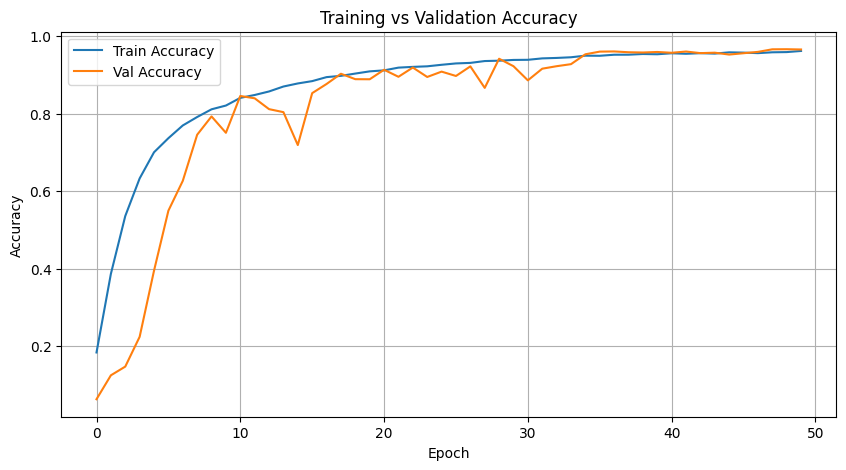

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


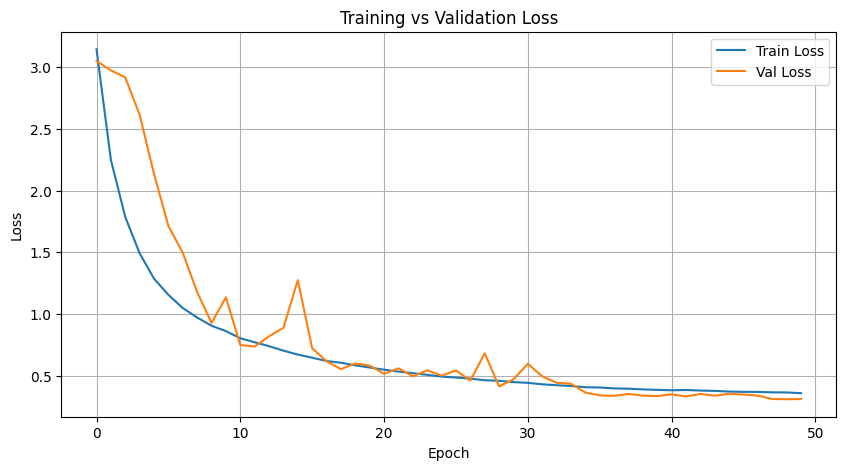

In [29]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [30]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Acc : {test_acc:.4f}")

Test Loss: 0.3156
Test Acc : 0.9629


In [31]:
y_pred_prob = model.predict(X_test, verbose=0)
y_pred = y_pred_prob.argmax(axis=1)

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=label_encoder.classes_.astype(str)))


              precision    recall  f1-score   support

           1       1.00      0.96      0.98       385
           2       0.97      0.97      0.97       370
           3       0.93      0.98      0.95       380
           4       0.97      0.98      0.98       478
           5       0.94      0.96      0.95       196
           6       0.98      0.98      0.98       329
           7       0.98      0.99      0.99       377
           9       1.00      0.96      0.98       167
          10       1.00      0.98      0.99       620
          11       1.00      0.98      0.99       109
          12       0.86      0.83      0.85       235
          13       0.88      0.91      0.89       209
          16       0.92      0.91      0.92       351
          17       0.96      0.98      0.97       477
          18       0.99      1.00      0.99       199
          19       0.96      0.98      0.97       375
          20       0.95      0.95      0.95        94
          24       1.00    

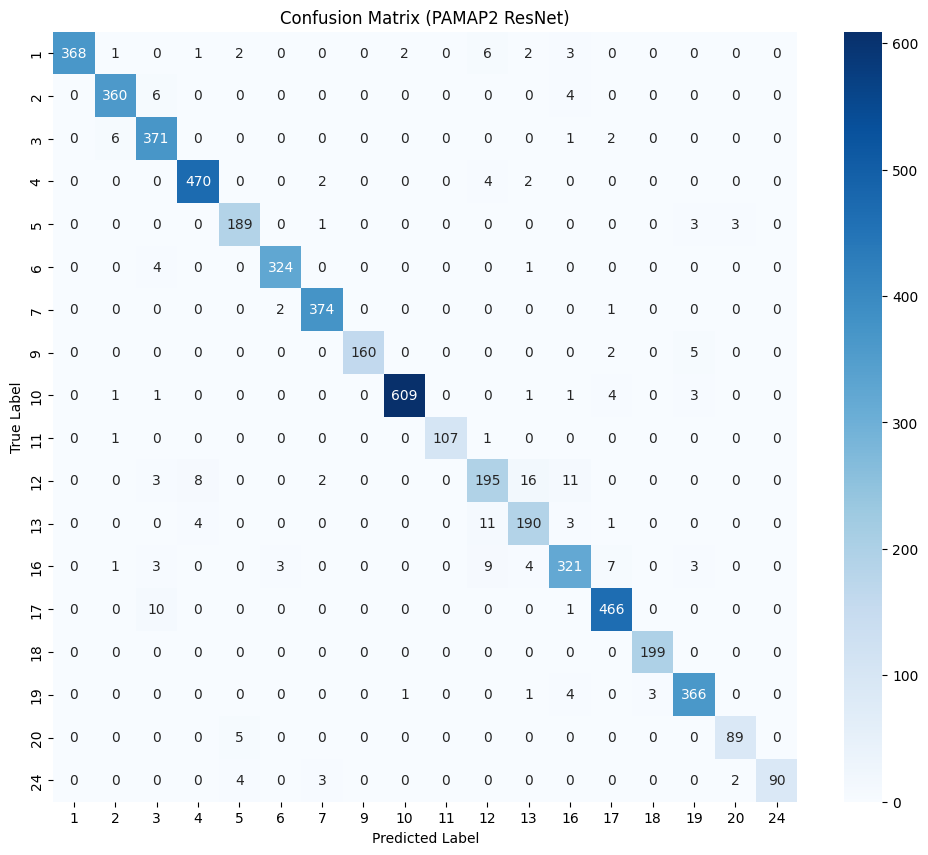

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (PAMAP2 ResNet)")
plt.show()
